In [2]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Chargement des données
file_path = './fichier_jointure_dpe_enedis.csv' 
df = pd.read_csv(file_path)

# Affichage des premières lignes pour comprendre la structure des données
df.head()

# Exploration rapide des données
print("Colonnes du DataFrame:", df.columns)
print("Dimensions du DataFrame:", df.shape)

C:\Users\33780\AppData\Local\Temp\ipykernel_13444\4291882734.py:12: DtypeWarning: Columns (94,107) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Colonnes du DataFrame: Index(['Conso_chauffage_dépensier_é_finale', 'Nom__commune_(BAN)',
       'Emission_GES_chauffage', 'Coût_total_5_usages',
       'Coordonnée_cartographique_X_(BAN)', 'Nombre_niveau_logement',
       'Type_installation_ECS_(général)', 'Conso_5_usages_par_m²_é_primaire',
       'Coût_refroidissement', 'Ubat_W/m²_K',
       ...
       'type_batiment_add', 'annee_etablissement_DPE', 'annee',
       'consommation_annuelle_totale_de_l_adresse_mwh',
       'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh',
       'consommation_annuelle_moyenne_de_la_commune_mwh',
       'adresse_normalisee_insee', 'nombre_de_logements',
       'consommation_estimee_dpe_mwh', 'ecart_consommation'],
      dtype='object', length=129)
Dimensions du DataFrame: (32865, 129)


In [3]:
# Calculons la matrice de corrélation pour toutes les colonnes numériques
correlation_matrix = df.corr(numeric_only=True)

# Trier les corrélations en fonction de la variable cible 'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'
target_corr = correlation_matrix['consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'].sort_values(ascending=False)

# Affichons les corrélations les plus élevées et les plus faibles par rapport à la consommation annuelle moyenne
top_corr = target_corr.head(10)
low_corr = target_corr.tail(10)

top_corr, low_corr


(consommation_annuelle_moyenne_par_site_de_l_adresse_mwh    1.000000
 consommation_annuelle_totale_de_l_adresse_mwh              0.526275
 ecart_consommation                                         0.475463
 Coût_ECS                                                   0.331393
 Conso_ECS_é_primaire                                       0.319690
 Conso_ECS_dépensier_é_primaire                             0.316417
 Coût_ECS_énergie_n°1                                       0.298004
 Coût_ECS_dépensier                                         0.280307
 Conso_5_usages_par_m²_é_primaire                           0.196853
 Conso_5_usages_é_primaire                                  0.194938
 Name: consommation_annuelle_moyenne_par_site_de_l_adresse_mwh, dtype: float64,
 Conso_refroidissement_é_primaire             NaN
 Emission_GES_refroidissement                 NaN
 Coût_refroidissement_dépensier               NaN
 Emission_GES_refroidissement_dépensier       NaN
 Conso_refroidissement_dépensi

Statistiques sur l'écart entre consommation réelle et DPE:
count    32865.000000
mean        -4.461074
std          4.529401
min        -17.344850
25%         -7.456000
50%         -3.618700
75%         -0.797400
max          5.306800
Name: écart_conso, dtype: float64


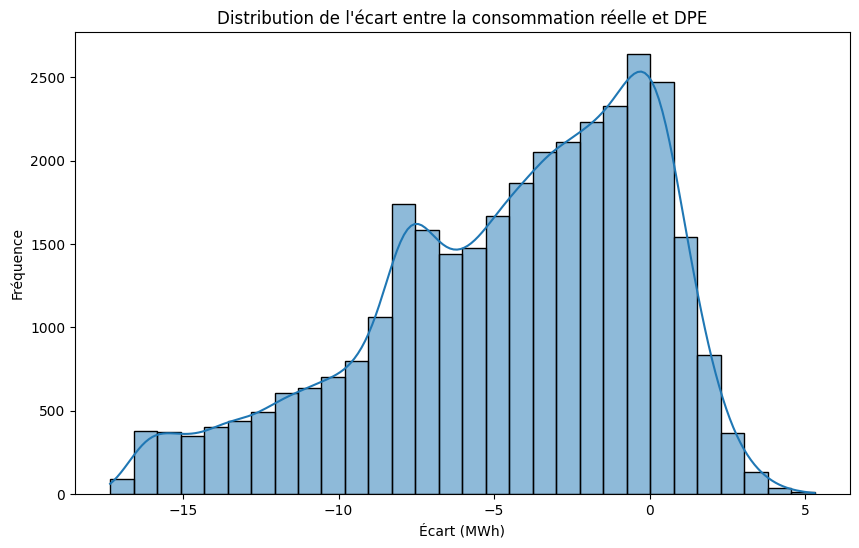

In [4]:
# Analyse de la consommation électrique moyenne réelle vs consommation DPE
# Nous allons comparer les colonnes consommation_annuelle_moyenne_par_site et la consommation DPE

# Calcul de l'écart entre la consommation réelle et la consommation estimée par le DPE
df['écart_conso'] = df['consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'] - df['consommation_estimee_dpe_mwh']

# Statistiques descriptives sur cet écart
print("Statistiques sur l'écart entre consommation réelle et DPE:")
print(df['écart_conso'].describe())

# Visualisation de la distribution de l'écart entre les consommations
plt.figure(figsize=(10, 6))
sns.histplot(df['écart_conso'], kde=True, bins=30)
plt.title("Distribution de l'écart entre la consommation réelle et DPE")
plt.xlabel("Écart (MWh)")
plt.ylabel("Fréquence")
plt.show()

Statistiques sur l'écart entre la consommation moyenne par logement et DPE:
count    32865.000000
mean        -4.436156
std          4.522165
min        -17.345123
25%         -7.396992
50%         -3.588933
75%         -0.808918
max         11.414721
Name: écart_conso_moyenne, dtype: float64


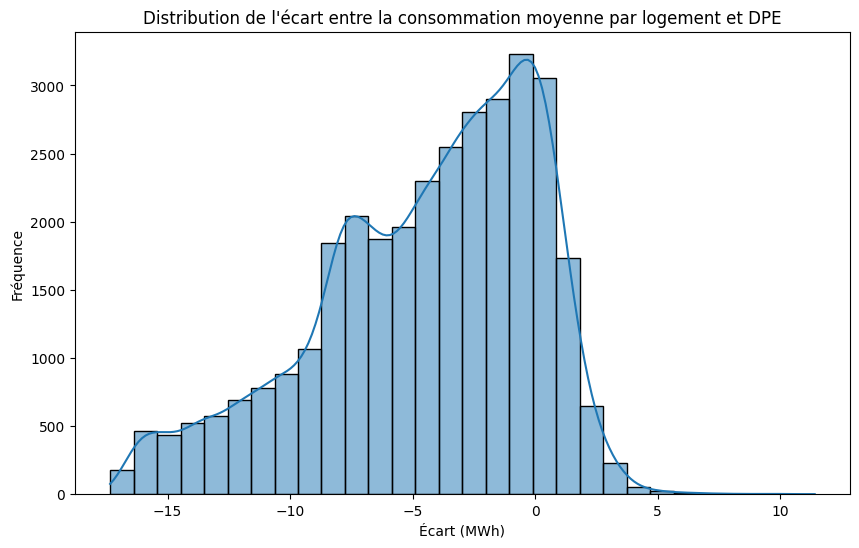

In [5]:
# Création de la colonne consommation moyenne par logement
df['consommation_moyenne'] = df['consommation_annuelle_totale_de_l_adresse_mwh'] / df['nombre_de_logements']

# Calcul de l'écart entre la consommation moyenne par logement et la consommation estimée par le DPE
df['écart_conso_moyenne'] = df['consommation_moyenne'] - df['consommation_estimee_dpe_mwh']

# Statistiques descriptives sur cet écart
print("Statistiques sur l'écart entre la consommation moyenne par logement et DPE:")
print(df['écart_conso_moyenne'].describe())

# Visualisation de la distribution de l'écart entre les consommations moyennes et DPE
plt.figure(figsize=(10, 6))
sns.histplot(df['écart_conso_moyenne'], kde=True, bins=30)
plt.title("Distribution de l'écart entre la consommation moyenne par logement et DPE")
plt.xlabel("Écart (MWh)")
plt.ylabel("Fréquence")
plt.show()


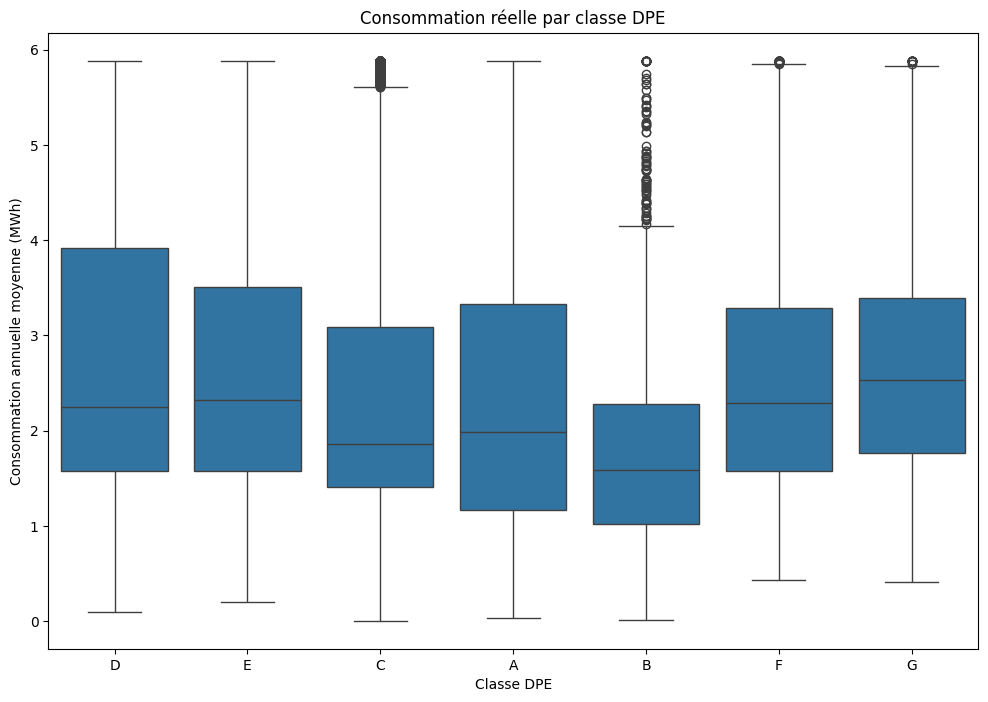

In [6]:
# Impact des classes DPE sur les consommations réelles
plt.figure(figsize=(12, 8))
sns.boxplot(x='Etiquette_DPE', y='consommation_annuelle_moyenne_par_site_de_l_adresse_mwh', data=df)
plt.title("Consommation réelle par classe DPE")
plt.xlabel("Classe DPE")
plt.ylabel("Consommation annuelle moyenne (MWh)")
plt.show()

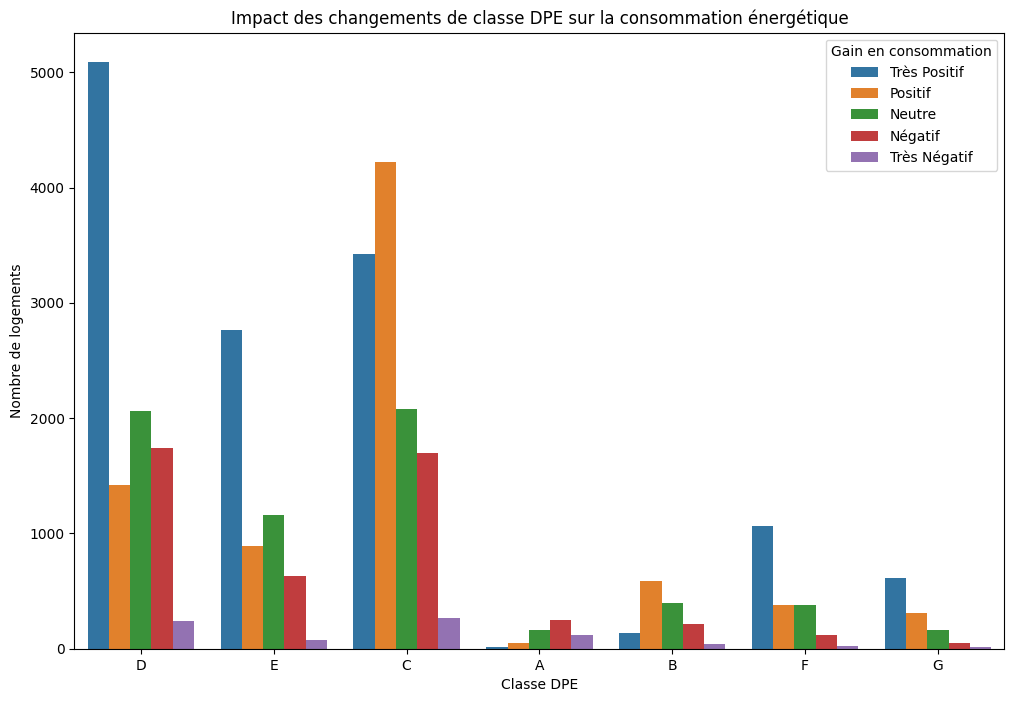

In [7]:
# Impact des travaux de rénovation - Comparaison des gains énergétiques entre classes
# Créons des bins pour mesurer les gains selon les changements de classe DPE
df['gain_DPE'] = pd.cut(df['écart_conso'], bins=[-np.inf, -5, -2, 0, 2, np.inf], labels=['Très Positif', 'Positif', 'Neutre', 'Négatif', 'Très Négatif'])

plt.figure(figsize=(12, 8))
sns.countplot(x='Etiquette_DPE', hue='gain_DPE', data=df)
plt.title("Impact des changements de classe DPE sur la consommation énergétique")
plt.xlabel("Classe DPE")
plt.ylabel("Nombre de logements")
plt.legend(title="Gain en consommation")
plt.show()

In [45]:
from sklearn.preprocessing import OrdinalEncoder

# Colonnes catégorielles à encoder
cat_cols = ['Type_installation_ECS_(général)', 
            'Qualité_isolation_menuiseries', 'Qualité_isolation_murs', 'Modèle_DPE',
            'Indicateur_confort_été', 'Type_énergie_n°1', 
            'Date_fin_validité_DPE', 'Type_bâtiment', 'Zone_climatique_', 
            'Type_installation_chauffage', 'Type_énergie_principale_chauffage', 
            'Qualité_isolation_enveloppe', 'Etiquette_GES', 'Etiquette_DPE', 
            'Qualité_isolation_plancher_bas', 'Qualité_isolation_plancher_haut_comble_aménagé', 
            'Besoin_refroidissement','Besoin_ECS']


df_cat = df[cat_cols].astype(str)
# Initialiser l'encodeur OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Appliquer l'encodage ordinal sur les colonnes catégorielles
encoded_cat = ordinal_encoder.fit_transform(df_cat)

# Transformer en DataFrame avec les mêmes colonnes qu'avant
encoded_cat_df = pd.DataFrame(encoded_cat, columns=cat_cols)

# Afficher un aperçu du DataFrame encodé
encoded_cat_df.head()


,Type_installation_ECS_(général),Qualité_isolation_menuiseries,Qualité_isolation_murs,Modèle_DPE,Indicateur_confort_été,Type_énergie_n°1,Date_fin_validité_DPE,Type_bâtiment,Zone_climatique_,Type_installation_chauffage,Type_énergie_principale_chauffage,Qualité_isolation_enveloppe,Etiquette_GES,Etiquette_DPE,Qualité_isolation_plancher_bas,Qualité_isolation_plancher_haut_comble_aménagé,Besoin_refroidissement,Besoin_ECS
0,1.0,3.0,0.0,0.0,2.0,8.0,842.0,2.0,1.0,1.0,10.0,3.0,1.0,3.0,0.0,3.0,0.0,640.0
1,1.0,1.0,1.0,0.0,0.0,6.0,767.0,0.0,1.0,1.0,6.0,2.0,3.0,3.0,1.0,3.0,0.0,11240.0
2,0.0,2.0,2.0,0.0,2.0,5.0,302.0,0.0,1.0,2.0,5.0,2.0,4.0,4.0,3.0,3.0,0.0,1188.0
3,1.0,0.0,3.0,0.0,2.0,8.0,38.0,0.0,1.0,1.0,6.0,3.0,2.0,3.0,3.0,3.0,0.0,5187.0
4,1.0,0.0,0.0,0.0,0.0,8.0,809.0,0.0,1.0,1.0,10.0,0.0,0.0,2.0,3.0,3.0,659.0,2842.0


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Colonnes à exclure
columns_to_exclude = [
    'nombre_de_logements', 
    'consommation_estimee_dpe_mwh', 
    'ecart_consommation',
    'Coût_total_5_usages', 'Coût_refroidissement', 'Coût_ECS_dépensier',
    'Coût_ECS', 'Coût_éclairage', 'Coût_ECS_énergie_n°1', 'Coût_refroidissement_dépensier',
    'Coût_chauffage', 'Coût_chauffage_dépensier', 'Coût_chauffage_énergie_n°1', 
    'Coût_auxiliaires', 'Coût_chauffage_énergie_n°2', 'Coût_ECS_énergie_n°2',
    'Conso_chauffage_dépensier_é_finale',
    'Conso_5_usages_par_m²_é_primaire',
    'Conso_ECS_dépensier_é_finale',
    'Conso_refroidissement_é_finale',
    'Conso_chauffage_é_primaire',
    'Conso_éclairage_é_primaire',
    'Conso_5_usages_é_finale',
    'Conso_refroidissement_é_primaire',
    'Conso_ECS_é_finale',
    'Conso_éclairage_é_finale',
    'Conso_ECS_dépensier_é_primaire',
    'Conso_refroidissement_dépensier_é_finale',
    'Conso_ECS_é_primaire',
    'Conso_5_usages_é_finale_énergie_n°1',
    'Conso_auxiliaires_é_primaire',
    'Conso_auxiliaires_é_finale',
    'Conso_chauffage_é_finale',
    'Conso_refroidissement_dépensier_é_primaire',
    'Conso_5_usages/m²_é_finale',
    'Conso_chauffage_dépensier_é_primaire',
    'Conso_5_usages_é_primaire',
    'Conso_ECS_dépensier_é_finale',
    'consommation_annuelle_totale_de_l_adresse_mwh',
    'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh',
    'consommation_annuelle_moyenne_de_la_commune_mwh','écart_conso', 'consommation_moyenne',
    'écart_conso_moyenne'
]



# Sélectionner les colonnes numériques
features_num = df.select_dtypes(include=[float]).drop(columns=columns_to_exclude)

# Concatenation des colonnes encodées et numériques
features = pd.concat([features_num, encoded_cat_df], axis=1)

# Sélectionner la cible (target)
target = 'consommation_annuelle_moyenne_par_site_de_l_adresse_mwh'

# Split des données
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

In [60]:
features_num.columns

Index(['Emission_GES_chauffage', 'Coordonnée_cartographique_X_(BAN)',
       'Nombre_niveau_logement', 'Ubat_W/m²_K', 'Emission_GES_auxiliaires',
       'Emission_GES_5_usages_par_m²', 'Emission_GES_éclairage',
       'Emission_GES_5_usages_énergie_n°1', 'Nombre_appartement',
       'N°_département_(BAN)', 'N°_région_(BAN)', 'Surface_habitable_logement',
       'Coordonnée_cartographique_Y_(BAN)', 'Emission_GES_ECS_dépensier',
       'Emission_GES_refroidissement', 'Emission_GES_ECS',
       'Emission_GES_5_usages', 'Code_postal_(BAN)',
       'Emission_GES_refroidissement_dépensier', 'Version_DPE',
       'Emission_GES_chauffage_dépensier', 'Hauteur_sous-plafond', 'Score_BAN',
       'Nombre_niveau_immeuble', 'Surface_habitable_immeuble',
       'Emission_GES_5_usages_énergie_n°2', 'N°_étage_appartement',
       'Déperditions_murs', 'Deperditions_planchers_bas',
       'Deperditions_planchers_hauts', 'Déperditions_renouvellement_air',
       'Déperditions_portes', 'Deperditions_baies_

In [61]:
encoded_cat_df.columns

Index(['Type_installation_ECS_(général)', 'Qualité_isolation_menuiseries',
       'Qualité_isolation_murs', 'Modèle_DPE', 'Indicateur_confort_été',
       'Type_énergie_n°1', 'Date_fin_validité_DPE', 'Type_bâtiment',
       'Zone_climatique_', 'Type_installation_chauffage',
       'Type_énergie_principale_chauffage', 'Qualité_isolation_enveloppe',
       'Etiquette_GES', 'Etiquette_DPE', 'Qualité_isolation_plancher_bas',
       'Qualité_isolation_plancher_haut_comble_aménagé',
       'Besoin_refroidissement', 'Besoin_ECS'],
      dtype='object')

In [62]:
import joblib 
# Sauvegarder les colonnes utilisées pour l'entraînement
joblib.dump(features.columns, 'columns_used_for_training.pkl')

['columns_used_for_training.pkl']

In [63]:
# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
# Enregistrer le scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [65]:
# Initialiser les modèles
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

# Comparer les modèles et calculer les R²
model_scores = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    model_scores[model_name] = r2

# Afficher les scores des modèles
model_scores

{'Linear Regression': 0.5727442040886819,
 'Random Forest Regressor': 0.7143633258294005,
 'Gradient Boosting Regressor': 0.6804028500361525}

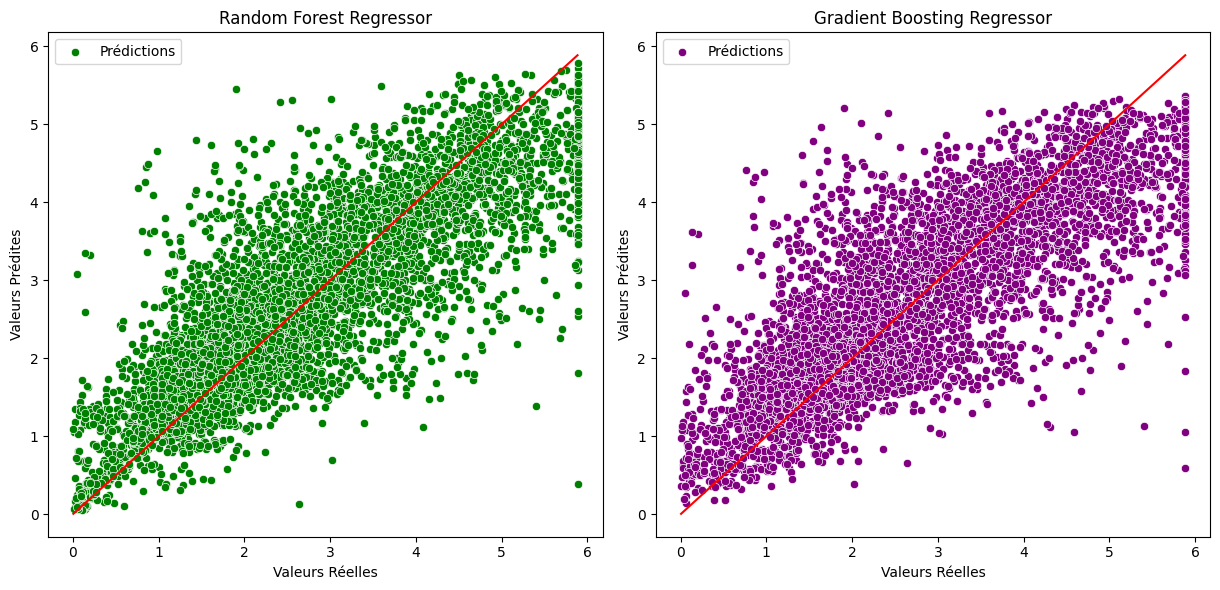

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_rf = models['Random Forest Regressor'].predict(X_test_scaled)
y_pred_gb = models['Gradient Boosting Regressor'].predict(X_test_scaled)

# Comparaison des valeurs réelles et prédites
plt.figure(figsize=(18, 6))



# Comparaison pour Random Forest Regressor
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, color='green', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Réelles')
plt.title('Random Forest Regressor')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')

# Comparaison pour Gradient Boosting Regressor
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_gb, color='purple', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Réelles')
plt.title('Gradient Boosting Regressor')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')

# Afficher le graphique
plt.tight_layout()
plt.show()


In [74]:
import joblib

# Trouver le meilleur modèle en fonction des scores R²
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]

# Enregistrer le meilleur modèle dans un fichier
joblib.dump(best_model, 'meilleur_modele.pkl')


['meilleur_modele.pkl']

In [77]:
import pandas as pd

df_rf = pd.DataFrame({
    'Valeurs Réelles': y_test,
    'Valeurs Prédites Random Forest': y_pred_rf
})

df_gb = pd.DataFrame({
    'Valeurs Réelles': y_test,
    'Valeurs Prédites Gradient Boosting': y_pred_gb
})

print("\nRandom Forest Results:\n", df_rf.head())  # Affiche les 5 premières lignes
print("\nGradient Boosting Results:\n", df_gb.head())  # Affiche les 5 premières lignes

# Si vous utilisez un notebook (Jupyter, Streamlit, etc.) :
# df_lr.head(), df_rf.head(), df_gb.head()  # Pour afficher dans le notebook



Random Forest Results:
        Valeurs Réelles  Valeurs Prédites Random Forest
13624            0.743                        1.053210
3710             3.197                        3.794350
31720            1.682                        1.975130
5886             1.170                        3.063530
19943            2.066                        2.288625

Gradient Boosting Results:
        Valeurs Réelles  Valeurs Prédites Gradient Boosting
13624            0.743                            0.798057
3710             3.197                            3.711393
31720            1.682                            1.976163
5886             1.170                            3.156599
19943            2.066                            2.085560


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for tuning Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
      'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest Regressor
rf_model_tuned = RandomForestRegressor()

# GridSearchCV to tune the parameters
grid_search_rf = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid_rf, cv=3, scoring='r2')

# Fit the model with grid search
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best model and R² score
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
best_rf_r2_score = r2_score(y_test, y_pred_best_rf)

# Return the best R² score and the best parameters
best_rf_r2_score, grid_search_rf.best_params_


C:\Users\33780\conda\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\33780\conda\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\33780\conda\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\33780\conda\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\33780\cond

(0.7139074891547426,
 {'max_depth': 20,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200})

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred_best_rf)
rmse = mean_squared_error(y_test, y_pred_best_rf, squared=False)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 0.5342538538319598
RMSE: 0.745407127537334


C:\Users\33780\conda\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


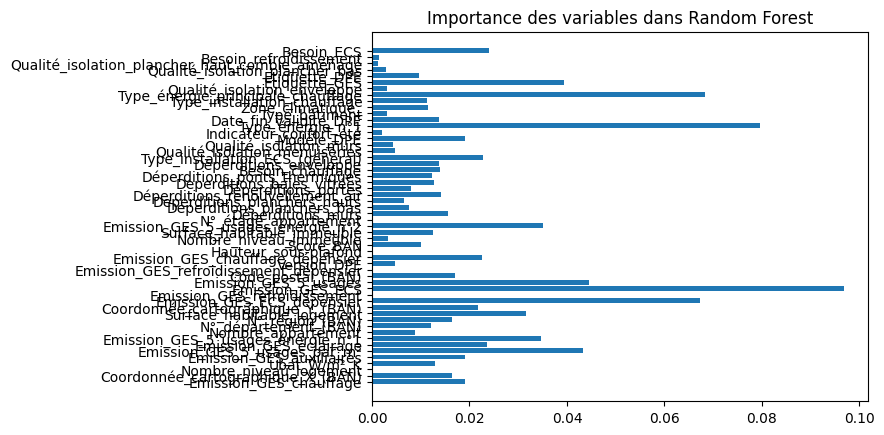

In [81]:
import matplotlib.pyplot as plt

# Importance des variables
importances = best_rf_model.feature_importances_
feature_names = features.columns

# Tracer les importances
plt.barh(feature_names, importances)
plt.title("Importance des variables dans Random Forest")
plt.show()


In [91]:
# Assuming `importances` and `feature_names` are already defined as numpy array and pandas Index respectively
import pandas as pd

# Create a DataFrame to pair the feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order for better readability
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df_sorted


,Feature,Importance
15,Emission_GES_ECS,0.096897
41,Type_énergie_n°1,0.079549
46,Type_énergie_principale_chauffage,0.068235
13,Emission_GES_ECS_dépensier,0.067345
16,Emission_GES_5_usages,0.044505
5,Emission_GES_5_usages_par_m²,0.043323
48,Etiquette_GES,0.039403
25,Emission_GES_5_usages_énergie_n°2,0.035075
7,Emission_GES_5_usages_énergie_n°1,0.034692
11,Surface_habitable_logement,0.031551


In [82]:
errors = abs(y_test - y_pred_best_rf)
worst_predictions = errors.sort_values(ascending=False).head(10)
print(worst_predictions)


14851    5.229857
926      4.559391
927      4.099647
291      3.706819
8528     3.692772
290      3.553772
26761    3.520294
664      3.507363
21332    3.488919
32339    3.290492
Name: consommation_annuelle_moyenne_par_site_de_l_adresse_mwh, dtype: float64


In [83]:
worst_cases = X_test.loc[worst_predictions.index]
print(worst_cases)


       Emission_GES_chauffage  Coordonnée_cartographique_X_(BAN)  \
14851               1150.9000                          704614.67   
926                  885.5000                          486998.83   
927                  652.3000                          486998.83   
291                  214.0000                          666212.51   
8528                2618.3375                          894009.57   
290                  228.9000                          666212.51   
26761                280.3000                          647754.10   
664                    1.1000                          868257.08   
21332                  1.7000                          631968.13   
32339               1997.7000                          659580.71   

       Nombre_niveau_logement  Ubat_W/m²_K  Emission_GES_auxiliaires  \
14851                     1.0         0.57                      0.20   
926                       1.0         0.36                      4.40   
927                       1.0      

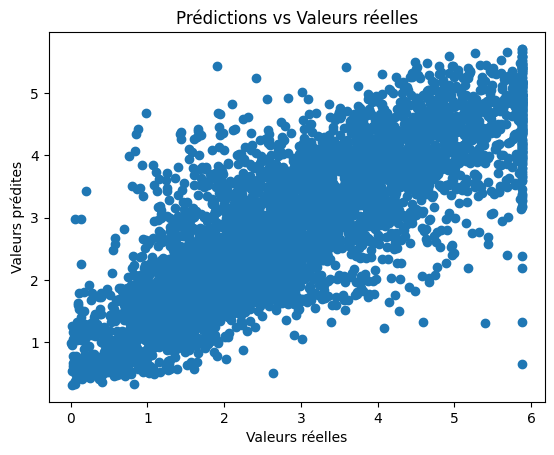

In [84]:
import matplotlib.pyplot as plt

# Visualiser les erreurs
plt.scatter(y_test, y_pred_best_rf)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Prédictions vs Valeurs réelles')
plt.show()


In [86]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

estimators = [
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=20)),
    ('xgb', XGBRegressor(n_estimators=200))
]

stacking_model = StackingRegressor(
    estimators=estimators, final_estimator=Ridge()
)

stacking_model.fit(X_train_scaled, y_train)
y_pred_stacking = stacking_model.predict(X_test_scaled)


In [87]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calcul du R²
r2_stacking = r2_score(y_test, y_pred_stacking)

# Calcul du MAE
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)

# Calcul du RMSE
rmse_stacking = mean_squared_error(y_test, y_pred_stacking, squared=False)

# Affichage des résultats
print(f"R²: {r2_stacking}")
print(f"MAE: {mae_stacking}")
print(f"RMSE: {rmse_stacking}")


R²: 0.7224252772574942
MAE: 0.5182741725831521
RMSE: 0.7342268358701596


C:\Users\33780\conda\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [97]:

colonnes_importantes = [
    'Emission_GES_ECS', 'Type_énergie_n°1', 'Type_énergie_principale_chauffage',
    'Emission_GES_ECS_dépensier', 'Emission_GES_5_usages', 'Emission_GES_5_usages_par_m²',
    'Etiquette_GES', 'Emission_GES_5_usages_énergie_n°2', 'Emission_GES_5_usages_énergie_n°1',
    'Surface_habitable_logement', 'Besoin_ECS', 'Emission_GES_éclairage',
    'Type_installation_ECS_(général)', 'Emission_GES_chauffage_dépensier', 'Coordonnée_cartographique_Y_(BAN)'
]

# Créer un nouveau DataFrame avec uniquement ces colonnes importantes
X_important = features[colonnes_importantes]

# Étape 2 : Utiliser le même jeu d'entraînement et de test
X_train_imp, X_test_imp, y_train, y_test = train_test_split(X_important, df[target], test_size=0.2, random_state=42)

# Standardiser les données comme tu l'avais fait
X_train_imp_scaled = scaler.fit_transform(X_train_imp)
X_test_imp_scaled = scaler.transform(X_test_imp)
# Réentraîner le modèle avec les colonnes importantes
best_rf_model.fit(X_train_imp_scaled, y_train)

# Faire des prédictions avec les colonnes importantes
y_pred_best_rf_imp = best_rf_model.predict(X_test_imp_scaled)

# Calculer le R²
r2_imp = r2_score(y_test, y_pred_best_rf_imp)
print("R² avec les colonnes importantes:", r2_imp)



R² avec les colonnes importantes: 0.6694380560262594
